In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import tigramite
from tigramite import data_processing
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
import pickle
from IPython.display import clear_output
from tigramite import plotting as tp
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [37]:
df_20h_plus = pd.read_csv("results/p/non_linear_p_DMC052_8h.csv" )
temp = df_20h_plus.iloc[0]

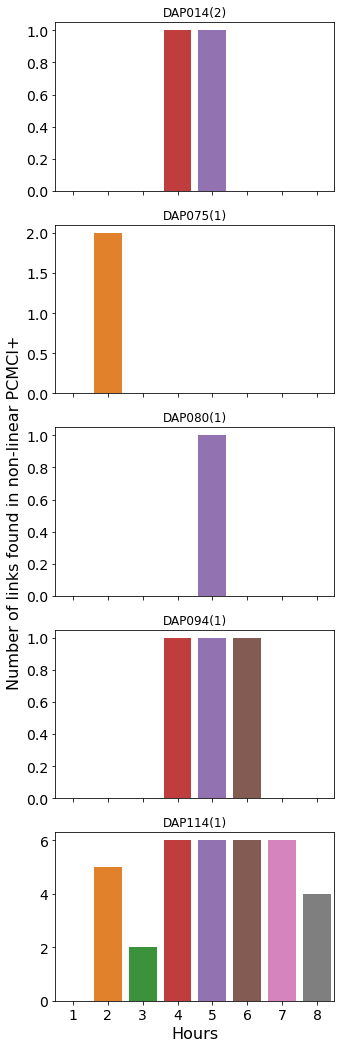

In [57]:
demo = pd.read_csv("results/p/demo_non_linear.csv", header = 0, index_col="trial")

targets =['DAP014(2)', 'DAP075(1)','DAP080(1)', 'DAP094(1)', 'DAP114(1)']

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(5, 18))

x = [j for j in range(1,9)]

for i in range(5):

    links_h_plus = []
    for j in range(8):
        links_h_plus.append(len(np.argwhere(demo.loc[targets[i][:-3]][(6*j):6*(j+1)].values <= 0.05)))

    sns.barplot(x = x, y = np.array(links_h_plus), ax = axs[i])
    axs[i].set_ylabel("")
    axs[i].set_title("{}".format(targets[i][:9]), fontsize = 12)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Number of links found in non-linear PCMCI+", fontsize = 16)
plt.savefig("results/plot/example_5_trials3.pdf")

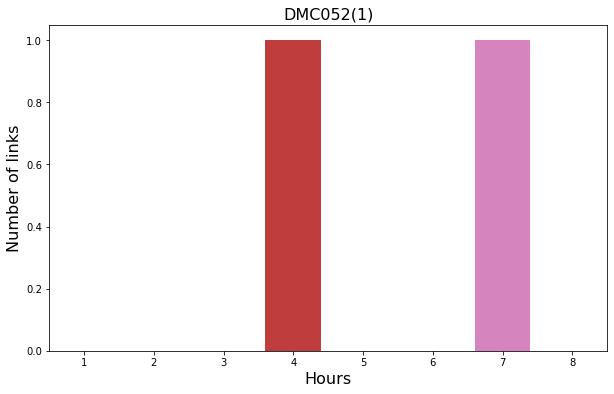

In [38]:
links_h_plus = []
x = [j for j in range(1,9)]
fig, ax = plt.subplots(figsize=(10,6))
for j in range(8):
    links_h_plus.append(len(np.argwhere(np.array(temp[(6*j):6*(j+1)]) <= 0.05)))

sns.barplot(x = x, y = np.array(links_h_plus))
ax.set_title("DMC052(1)", fontsize = 16)

#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Number of links", fontsize = 16)

plt.savefig("results/plot/links_DMC052.pdf")

In [59]:
def sort_df(df):
    return df.sort_index()

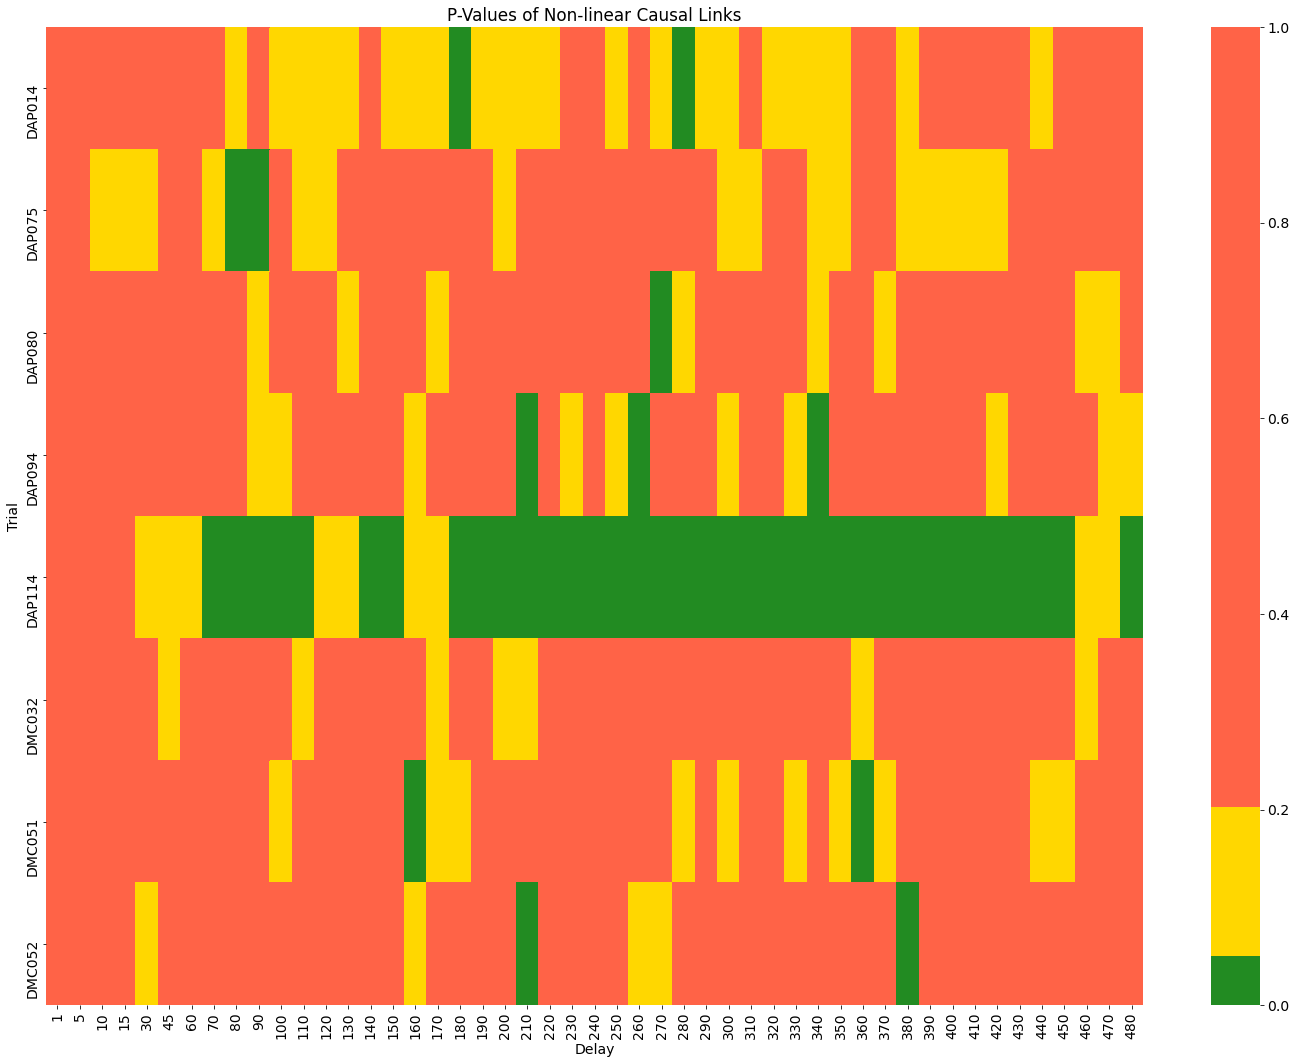

In [61]:
from matplotlib.colors import colorConverter, ListedColormap
from matplotlib import cm
import matplotlib

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
green = np.array(colorConverter.to_rgba("forestgreen"))
yellow = np.array(colorConverter.to_rgba("gold"))
red = np.array(colorConverter.to_rgba("tomato"))
newcolors[:13, :] = green
newcolors[13:52, :] = yellow
newcolors[52:, :] = red
newcmp = ListedColormap(newcolors)

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rcParams.update({'font.size': 14})

df = pd.read_csv("results/p/demo_non_linear.csv", header = 0)
#df = pd.read_csv("linear/linear_p.csv")
#for i in range(df.shape[0]):
#    df.loc[i,'trial'] = df.loc[i,'trial'][:-4]
df = sort_df(df.set_index("trial"))
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(df, vmin=0, vmax=1, cmap=newcmp)
ax.set_ylabel("Trial")
ax.set_xlabel("Delay")
ax.set_title("P-Values of Non-linear Causal Links")
#ax.set_xticks([x for x in range(1, 481)])
plt.tight_layout()
plt.savefig("non_linear_results_plus.png", dpi=300)
plt.show()